# Tugas Besar 1D - Pembelajaran Mesin


#### Anggota Kelompok
1. Ahmad Mutawalli - 13517026, K02
2. Harry Rahmadi Munly - 13517033, K03
3. Ardysatrio Fakhri Haroen - 13517062, K02
4. Dandi Agus Maulana - 13517077, K02

## A. Import Dependencies and Load Data

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import sys
import joblib

from dtl.myC45 import Tree as MyC45
from mlp.MyMLP import Network as MyMLP

import warnings
warnings.filterwarnings('ignore')

In [99]:
#Load dataset
X_iris, y_iris = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']); iris_data['label'] = y_iris
iris_data = iris_data.sample(frac=1)
X_iris = iris_data.drop('label', axis=1)
y_iris = iris_data['label']
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width  label
148           6.2          3.4           5.4          2.3      2
113           5.7          2.5           5.0          2.0      2
99            5.7          2.8           4.1          1.3      1
95            5.7          3.0           4.2          1.2      1
124           6.7          3.3           5.7          2.1      2

## B. Define Functions and Procedures

In [100]:
#mencetak confusion matrix dengan layout yang mudah dilihat
def print_confusion_matrix(y_test, pred_result):
    cm = confusion_matrix(y_test, pred_result)
    cm = pd.DataFrame(cm, index=[i for i in range(3)], columns=[i for i in range(3)])
    sns.heatmap(cm, annot=True)
    plt.show()
    
#menghitung skor akurasi     
def accuracy_score(target, pred):
    sums = 0
    for i in range(len(pred)):
        if(pred[i] == target[i]):
           sums += 1
    return float(sums)/float(len(pred))

#Membagi data dengan cross-validation
def split_data_crossval(X, y, n_split=10):
    #Splitting data: KFold Cross Validation Indexing
    kfold = KFold(n_splits=n_split)
    split = kfold.split(X, y)

    train_indexes = []
    test_indexes = []
    for train, test in split:
        train_indexes.append(train)
        test_indexes.append(test)
    
    return train_indexes, test_indexes 

#melakukan iterasi k-fold cross validation
def cross_validate(X, y, model_name):
    
    #get train and test indexes
    train_indexes, test_indexes = split_data_crossval(X, y)

    scores = []
    #for each indexes in train_idx, train and test the model on it
    for train_idx, test_idx in zip(train_indexes, test_indexes):
        X_train = X[train_idx]; y_train = y[train_idx]
        X_test = X[test_idx]; y_test = y[test_idx]
        
        if(model_name == 'c45'):
            #train model
            train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            train_data['label'] = pd.Series(y_train)
            
            test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
            test_data['label'] = pd.Series(y_test)
                        
            clf = MyC45(train_data, 'label')
            clf.make_tree()
            
            #get result
            pred_result = clf.predict(pd.DataFrame(test_data))
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
        elif(model_name == 'mlp'):
            #train model
            net = MyMLP(4, 4)
            net.fit(X_train, y_train, epoch_limit=100)
            
            #get result
            pred_result = net.predict(X_test)
            #get accuracy
            scores.append(accuracy_score(pred_result, y_test))
            
    #return list of cross val scores
    return scores
               


## C. Train Test Split and Confusion Matrix

### C.1. Model C4.5

-------predict-------
Prediction with C4.5
Prediction Accuracy: 93.33333333333333%
CONFUSION MATRIX (Row:True, Column:Prediction)


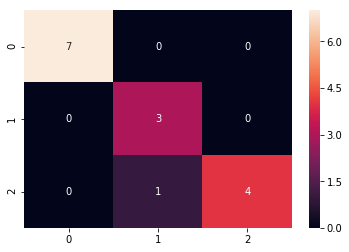

In [128]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
train_data['label'] = pd.Series(y_train)
            
test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
test_data['label'] = pd.Series(y_test)

clf = MyC45(train_data, 'label')
clf.make_tree()

#get result
pred_result = clf.predict(pd.DataFrame(test_data))

#print Accuracy
print("Prediction with C4.5")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

### C.2. Model MLP

Prediction with MLP
Prediction Accuracy: 93.33333333333333%
CONFUSION MATRIX (Row:True, Column:Prediction)


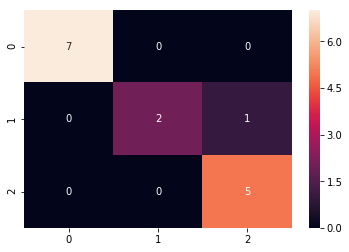

In [129]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

#train model
net = MyMLP(4, 4)
net.fit(X_train.values, y_train.values, epoch_limit=100)

#get result
pred_result = net.predict(X_test.values)

#print Accuracy
print("Prediction with MLP")
print("Prediction Accuracy: ", accuracy_score(y_test.values, pred_result) * 100 , "%", sep='')

#print confusion matrix
print("CONFUSION MATRIX (Row:True, Column:Prediction)")
print_confusion_matrix(y_test, pred_result)

## D. 10-fold Cross Validation

### D.1. Model C4.5

In [111]:
c45_score = cross_validate(X_iris.values, y_iris.values, 'c45')
print("Average From 10-fold Cross Validation with C4.5:", np.mean(np.array(c45_score)))

-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
-------predict-------
Average From 10-fold Cross Validation with C4.5: 0.9466666666666667


### D.2. Model MLP

In [112]:
mlp_score = cross_validate(X_iris.values, y_iris.values, 'mlp')
print("Average From 10-fold Cross Validation with MLP:", np.mean(np.array(mlp_score)))

Average From 10-fold Cross Validation with MLP: 0.9266666666666665


## E. Export and Import Model


### E.1. C4.5

#### E.1.A. Export C4.5

#### E.1.B. Import C4.5

### E.2. MLP

#### E.2.A. Export MLP

In [115]:
#Train Model
clf = MyMLP(4, 4)
clf.fit(X_iris.values, y_iris.values, epoch_limit=100)

#show weights
clf.print_w_ItoH()
clf.print_w_HtoO()

#Save model
filename = 'mlp_model.sav'
joblib.dump(clf, filename)

          Hidden0   Hidden1   Hidden2   Hidden3
WInput0 -4.655383 -0.768451  0.759309  0.797660
WInput1 -4.178536 -1.833589  0.964477  0.329022
WInput2  6.646115  3.209918 -0.049183  0.707252
WInput3  4.789148  1.137971  0.541495  0.036774
WInput4 -1.398108  0.283681 -0.015717 -0.727474
           Output0   Output1   Output2
WHidden0 -2.687694 -4.996019  5.539504
WHidden1 -5.530517  5.206091  1.140628
WHidden2  2.085549  0.139709 -1.035228
WHidden3  0.113448 -1.054427 -1.778405
WHidden4  0.607457 -1.741555 -1.268290


['mlp_model.sav']

#### E.2.B. Import MLP

In [116]:
loaded_clf = joblib.load(filename)
loaded_clf.print_w_ItoH()
loaded_clf.print_w_HtoO()

          Hidden0   Hidden1   Hidden2   Hidden3
WInput0 -4.655383 -0.768451  0.759309  0.797660
WInput1 -4.178536 -1.833589  0.964477  0.329022
WInput2  6.646115  3.209918 -0.049183  0.707252
WInput3  4.789148  1.137971  0.541495  0.036774
WInput4 -1.398108  0.283681 -0.015717 -0.727474
           Output0   Output1   Output2
WHidden0 -2.687694 -4.996019  5.539504
WHidden1 -5.530517  5.206091  1.140628
WHidden2  2.085549  0.139709 -1.035228
WHidden3  0.113448 -1.054427 -1.778405
WHidden4  0.607457 -1.741555 -1.268290


Karena weight sama persis, export dan import model telah berhasil 

## F. Klasifikasi Instance Baru

### F.1. Dengan C4.5

### F.2. Dengan MLP

In [127]:
instance_pred = loaded_clf.predict(np.array([[5.5, 4.2, 5.7, 1.5]]))
print("Hasil Kelas Prediksi:", int(instance_pred[0]))

Hasil Kelas Prediksi: 2
